In [5]:
import pandas as pd 
import numpy as np 
import geopy.distance
import random
from sklearn.model_selection import train_test_split

In [56]:
df = pd.read_excel('../ML/new_data_houses.xlsx')


In [58]:
df.head()

,Qiymət,C1,C2,Kateqoriya,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,Təmir
0,94500,40402511534715,498518545575805,0,5/5,53.0,2,1,0,1
1,126500,40404505013218,498509533353515,0,4/5,72.0,3,1,0,1
2,285000,404065973528723,49873263732787,1,4/18,122.2,3,1,0,1
3,87000,403766022856081,498478599128418,0,2/3,40.0,2,1,0,0
4,75000,404028671018614,49870570791354,0,3/5,30.0,2,1,0,1


In [60]:
df.sort_values(by = 'Sahə')

,Qiymət,C1,C2,Kateqoriya,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,Təmir
1712,48000,404003414239208,498657642606062,0,4/5,20.0,1,1,0,1
537,35000,404081269510133,498741269754058,0,2/4,22.0,1,1,0,1
184,43000,404049461849082,498628194280333,0,5/5,22.0,1,1,0,0
668,56000,403809870961507,498473127422028,0,2/2,25.0,1,1,0,0
313,57000,403804750153692,49846584072358,0,2/2,25.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
497,1500000,403985822593718,498579926886844,1,16/17,650.0,6,1,0,1
448,1500000,403982378202293,498582237892412,1,15/16,750.0,6,1,1,0
299,1500000,403789234510621,498443408546143,1,21/22,750.0,16,1,0,1
710,790000,404037235060919,498748216284029,1,4/4,800.0,8,1,0,1


In [62]:
df.columns = ['Price', 'C1', 'C2', 'Category', 'Floor', 'Area', 'Rooms', 'Documented', 'Mortgage', 'Repaired']
df = df[df.Price<700000].copy()

In [64]:
df = df.reset_index().drop('index', axis = 1).copy()

In [66]:
df.head(5)

,Price,C1,C2,Category,Floor,Area,Rooms,Documented,Mortgage,Repaired
0,94500,40402511534715,498518545575805,0,5/5,53.0,2,1,0,1
1,126500,40404505013218,498509533353515,0,4/5,72.0,3,1,0,1
2,285000,404065973528723,49873263732787,1,4/18,122.2,3,1,0,1
3,87000,403766022856081,498478599128418,0,2/3,40.0,2,1,0,0
4,75000,404028671018614,49870570791354,0,3/5,30.0,2,1,0,1


In [68]:
def clearCordinates(col): 
    col = str(col)
    col = col[:2] + '.' + col[2:]
    return float(col)

In [70]:
df['C1'] = df['C1'].apply(clearCordinates)
df['C2'] = df['C2'].apply(clearCordinates)

In [72]:
df['HomeFloor'] = df['Floor'].apply(lambda x: int(x.split('/')[0]))
df['Floor']     = df['Floor'].apply(lambda x: int(x.split('/')[1]))

In [74]:
df.head()

,Price,C1,C2,Category,Floor,Area,Rooms,Documented,Mortgage,Repaired,HomeFloor
0,94500,40.402512,49.851855,0,5,53.0,2,1,0,1,5
1,126500,40.404505,49.850953,0,5,72.0,3,1,0,1,4
2,285000,40.406597,49.873264,1,18,122.2,3,1,0,1,4
3,87000,40.376602,49.847860,0,3,40.0,2,1,0,0,2
4,75000,40.402867,49.870571,0,5,30.0,2,1,0,1,3


In [76]:
metroCoordinates = [
    (40.3798499,49.8485742), #28May
    (40.4004909,49.8506117), #Ganjlik
    (40.4028298,49.8684909)] #Narimanov

In [78]:
def how_far(co1, co2):
    return (geopy.distance.geodesic(co1, co2).m)

In [80]:
df['distanceToMetro'] = 0.0
for i in range(len(df)):
    home_cord_tuple = (df.iloc[i]['C1'],df.iloc[i]['C2'])
    distances = []
    for metro_cordinate in metroCoordinates:
        distances.append( how_far (home_cord_tuple, metro_cordinate))
    df.loc[i, 'distanceToMetro'] = min(distances)

In [81]:
df.sample()

,Price,C1,C2,Category,Floor,Area,Rooms,Documented,Mortgage,Repaired,HomeFloor,distanceToMetro
18,167000,40.403106,49.877623,1,16,128.7,3,0,0,1,9,775.81232


In [82]:
df.iloc[0]['C1']

40.402511534715

In [83]:
how_far((df.iloc[0]['C1'],df.iloc[0]['C2']),  (40.4028298,49.8684909))

1412.703687549712

In [84]:
df.head()

,Price,C1,C2,Category,Floor,Area,Rooms,Documented,Mortgage,Repaired,HomeFloor,distanceToMetro
0,94500,40.402512,49.851855,0,5,53.0,2,1,0,1,5,247.944726
1,126500,40.404505,49.850953,0,5,72.0,3,1,0,1,4,446.679161
2,285000,40.406597,49.873264,1,18,122.2,3,1,0,1,4,582.386062
3,87000,40.376602,49.847860,0,3,40.0,2,1,0,0,2,365.687164
4,75000,40.402867,49.870571,0,5,30.0,2,1,0,1,3,176.610399


In [85]:
df.drop(['C1', 'C2'], axis = 1, inplace = True)

In [86]:
df.head()

,Price,Category,Floor,Area,Rooms,Documented,Mortgage,Repaired,HomeFloor,distanceToMetro
0,94500,0,5,53.0,2,1,0,1,5,247.944726
1,126500,0,5,72.0,3,1,0,1,4,446.679161
2,285000,1,18,122.2,3,1,0,1,4,582.386062
3,87000,0,3,40.0,2,1,0,0,2,365.687164
4,75000,0,5,30.0,2,1,0,1,3,176.610399


In [115]:
class LinearRegression2:
    def __init__(self, alpha = 0.1, n_iterations = 1000, normalize = True):
        self.alpha = alpha
        self.n_iterations = n_iterations
        self.coef_ = None
        self.normalize = normalize
        self.bias = None

    def __call__(self, X):
        return self.predict(X)
        
    def costFunction(self, X, Y, W):
        return np.sum((X.dot(W) - Y) ** 2) / (2 * len(X))
        
    def _standardize(self, X):
        self.mean_ = np.array(X.mean(axis=0))
        self.std_ = np.array(X.std(axis=0))
        self.std_[self.std_ == 0] = 1  
        return (X - self.mean_) / self.std_
        
    def fit(self, X, Y):
        if self.normalize == True:
            X = self._standardize(X)
            
        X_ = np.c_[np.ones(len(X)), X]
        w  = np.array([random.randint(1, 100)] * X_.shape[1])
        
        for i in range(self.n_iterations):
            h = X_.dot(w)
            diff = (h - Y)
        
            gradient = self.alpha * (X_.T.dot(diff)) / X.shape[0]
            w = w - gradient
        self.coef_ = w[1:]
        self.bias = w[0]

    def predict(self, X):
        X = np.array(X, dtype=float)
    
        if X.ndim == 1:
            X = X.reshape(1, -1)
    
        if self.normalize:
            X = (X - self.mean_) / self.std_
    
        predicted = np.dot(X, self.coef_) + self.bias
        return np.round(predicted, 5)

In [88]:
df.head()

,Price,Category,Floor,Area,Rooms,Documented,Mortgage,Repaired,HomeFloor,distanceToMetro
0,94500,0,5,53.0,2,1,0,1,5,247.944726
1,126500,0,5,72.0,3,1,0,1,4,446.679161
2,285000,1,18,122.2,3,1,0,1,4,582.386062
3,87000,0,3,40.0,2,1,0,0,2,365.687164
4,75000,0,5,30.0,2,1,0,1,3,176.610399


In [89]:
X = df.drop('Price', axis = 1) 
y = df['Price']

In [90]:
132/1932

0.06832298136645963

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.07)

In [93]:
model = LinearRegression2(normalize = True)
model.fit(X_train, y_train)

In [94]:
model.coef_

array([ 5062.88858804,  4238.54687149, 83553.29564905, 12832.16160387,
       16530.30737303, -3276.048409  ,  7732.90163955, -1467.91155475,
         260.41090295])

In [95]:
y_predict = model.predict(X_test)

In [96]:
res = pd.DataFrame(y_test)

In [97]:
res['pred_ours'] = y_predict

In [98]:
# res['diff'] = res['Price'] - res['pred']

# res['diff'] = res['diff'].apply(abs) 

In [100]:
res

,Price,pred_ours
1020,90000,85100.05745
1401,350000,323991.08544
274,145000,121872.96718
509,252000,381828.06106
1571,205000,266603.57113
...,...,...
1148,165000,192999.74494
287,285000,410810.32437
1232,165000,138269.70534
1717,126000,145908.01370


In [101]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

In [103]:
res['predLib'] = y_pred2

In [104]:
res

,Price,pred_ours,predLib
1020,90000,85100.05745,85100.065212
1401,350000,323991.08544,323991.070637
274,145000,121872.96718,121872.960401
509,252000,381828.06106,381828.075742
1571,205000,266603.57113,266603.572599
...,...,...,...
1148,165000,192999.74494,192999.739247
287,285000,410810.32437,410810.357201
1232,165000,138269.70534,138269.683802
1717,126000,145908.01370,145907.981668


In [105]:
sum(abs(res['Price'] - res['pred_ours']))/ len(y_test)

46341.29135518797

In [106]:
(99 * 20000 + 2000000)/100

39800.0

In [107]:
res['error'] = abs(res['Price'] - res['pred_ours'])

In [108]:
res.sort_values(by = 'error', ascending = False).head(30)

,Price,pred_ours,predLib,error
1433,260000,613099.66722,613099.661006,353099.66722
705,655000,346614.30036,346614.323486,308385.69964
820,380000,146517.88851,146517.900065,233482.11149
347,670000,443715.45224,443715.509833,226284.54776
1572,480000,261417.86505,261417.877933,218582.13495
198,660000,451070.76855,451070.827494,208929.23145
818,550000,386020.14990,386020.118752,163979.85010
435,575000,413780.05042,413780.089773,161219.94958
774,380000,219236.88658,219236.879035,160763.11342
1279,510000,352632.32309,352632.322380,157367.67691


In [109]:
#58778

In [110]:
df.loc[145]

Price              28000.00000
Category               0.00000
Floor                  3.00000
Area                 130.00000
Rooms                  3.00000
Documented             1.00000
Mortgage               0.00000
Repaired               0.00000
HomeFloor              2.00000
distanceToMetro      578.40174
Name: 145, dtype: float64

In [111]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [127]:
shap.initjs()

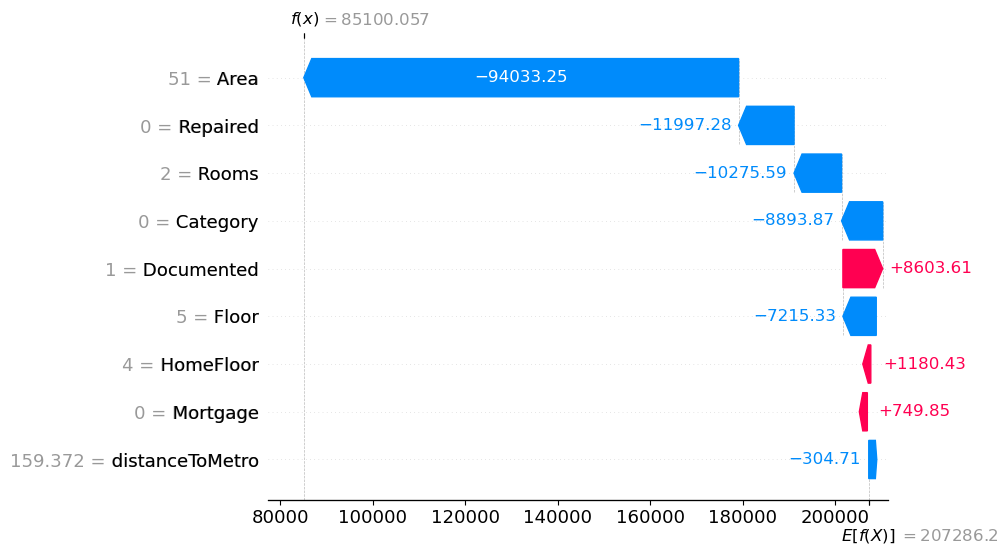

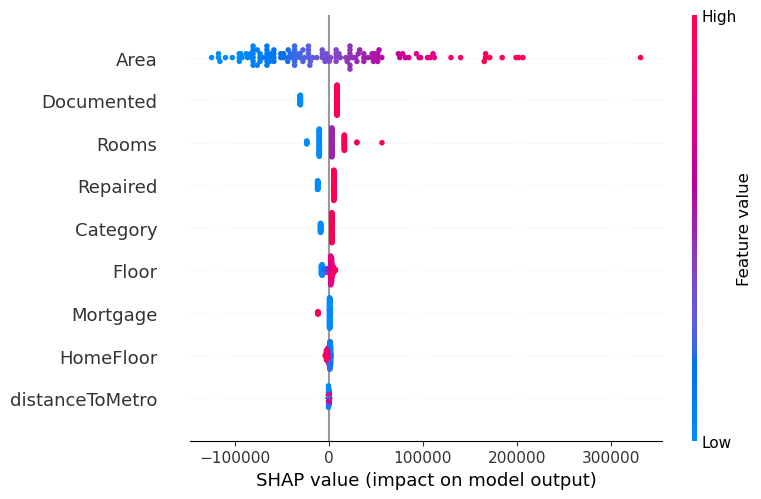

In [137]:
import shap
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.datasets import load_boston  # You can use your own dataset
import matplotlib.pyplot as plt



# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
#model = LinearRegression2()
#model.fit(X_train, y_train)
explainer = shap.Explainer(model.predict, X_train)

# Create SHAP explainer for linear models
#explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for test data
shap_values = explainer(X_test)
shap.waterfall_plot(shap_values[0])
# Visualize SHAP summary
shap.summary_plot(shap_values, X_test)

# (Optional) Force plot for one prediction
shap.plots.force(shap_values[0])


In [135]:
shap.force_plot(
    shap_values.base_values[0],
    shap_values.values[0],
    X_test.iloc[0]  
)


In [139]:
shap.plots.force(shap_values[0])

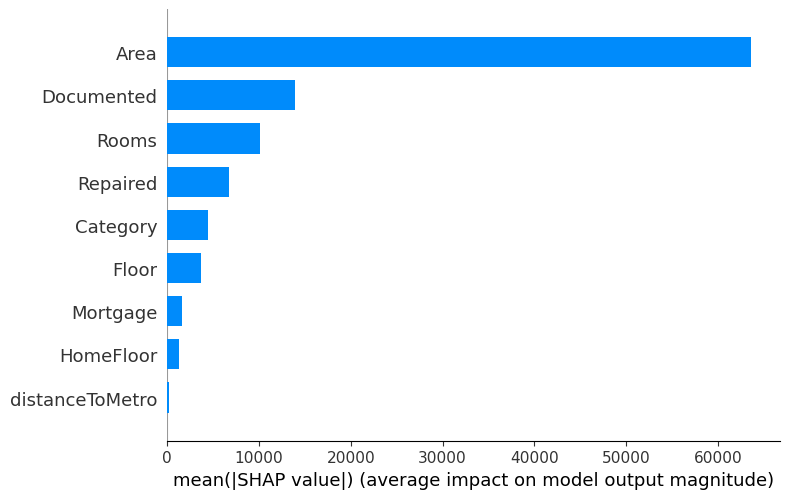

In [141]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


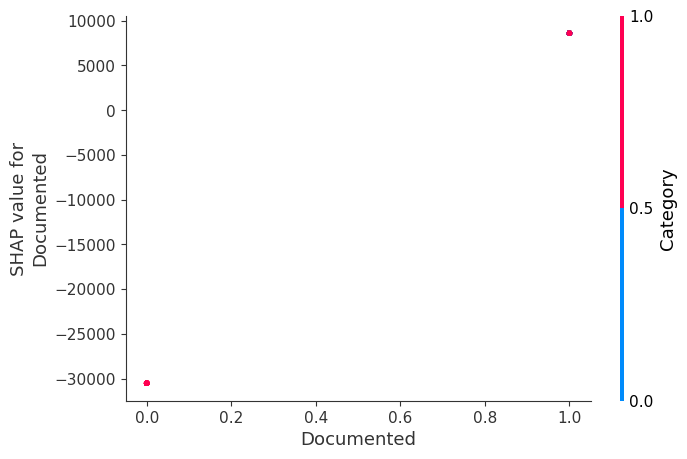

In [147]:
shap.dependence_plot(4, shap_values.values, X_test)  # for feature index 0


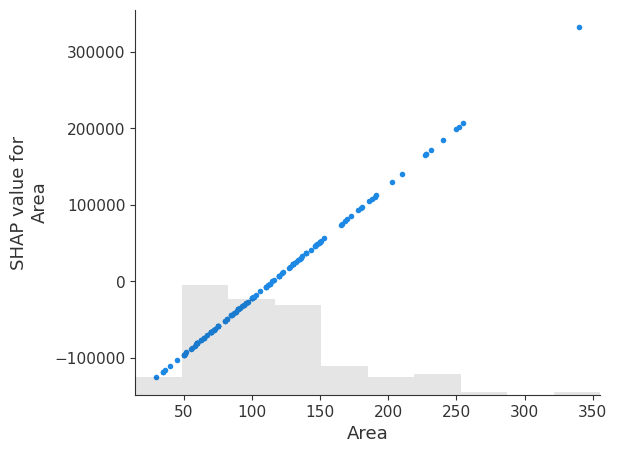

In [149]:
shap.plots.scatter(shap_values[:, "Area"])

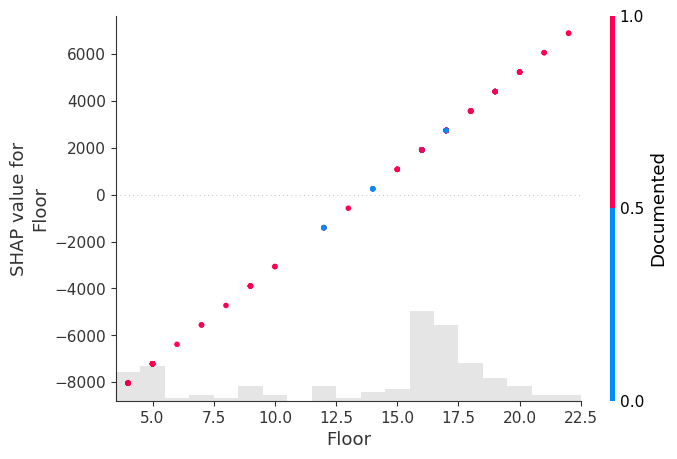

In [153]:
shap.plots.scatter(shap_values[:, "Floor"], color=shap_values[:, "Documented"])